In [66]:
!pip install -r '../requirements.txt';
sys.path.append('..');

In [67]:
import sys
import pickle

import torch
import matplotlib.pyplot as plt
from scipy.io import wavfile
from preprocess_audio import SdaContent

In [68]:
def load_data(mc_file) -> SdaContent:
    with open(mc_file, 'rb') as f:
        return pickle.load(f)

In [69]:
# Take first and last models
from nn.data_prep import sample_interval

nets = [torch.load(f"../data/res/models/1578999854657/model-{i}.0.dict") for i in [1, 7]]
for net in nets:
    net.eval()

start = 1630
end = 1700
mfcc_content = load_data("../data/res/young_pope/typ8.mc")
rate, sig = wavfile.read('../data/raw/young_pope/audio/typ8.wav')
seq_length = int((end - start) / mfcc_content.frame_step)
inputs, labels, audio = sample_interval(mfcc_content,
                                        sig, rate,
                                        start, end)

In [70]:
import IPython.display as ipd
ipd.Audio(audio, rate=rate)         

In [71]:
from nn.evaluate_nn import get_eval_stats, format_model_stats
# output has a shape of 1 x 2000 x 1 so we need to get rid of 1th dimensions
outs = [net(torch.tensor(inputs.reshape(1, seq_length, -1), dtype=torch.float64)).detach().numpy()[0, :, 0]
        for net in nets]
stats = [get_eval_stats(output, labels) for output in outs]
for stat in stats:
    print(format_model_stats(stat))


        Silent samples 5010, voice samples: 1990
        Silence hits   3469     , misses 1541, score 2.2511356262167426
        Voiced hits    827     , misses 1163, score 0.711092003439381
        Total score    1.8101887768295837
    

        Silent samples 5010, voice samples: 1990
        Silence hits   4039     , misses 971, score 4.159629248197734
        Voiced hits    992     , misses 998, score 0.9939879759519038
        Total score    2.3592854735422986
    


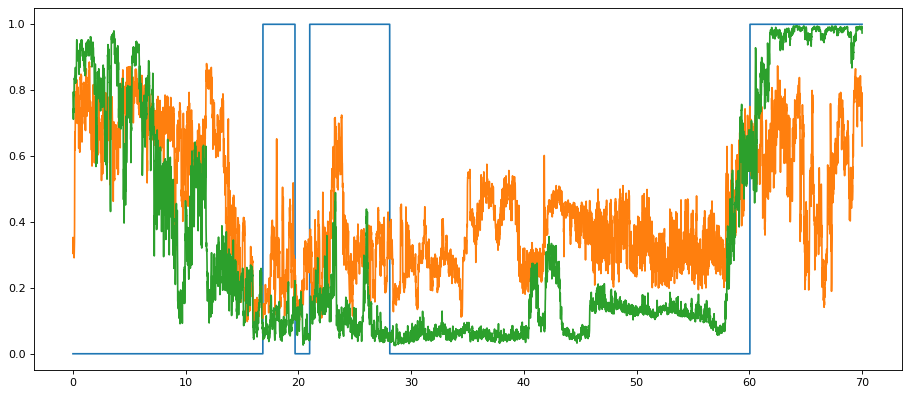

In [72]:
# plot models predictions
%matplotlib inline
from nn.evaluate_nn import plot_model_output

fig = plt.figure(figsize=(14, 6), dpi= 80, facecolor='w', edgecolor='k')


plt.plot(np.linspace(0, seq_length / 100, seq_length), labels)
for out in outs:
    plot_model_output(out, seq_length)

plt.show()